In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split

In [2]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum(np.square(a-b), axis=-1, keepdims=False))

# Klassifizierung
### Daten definieren

In [3]:
informatik = np.array([0, 0, 2, 3, 4, 4, 4, 5, 6, 7]) # Info, Bio
bio = np.array([0, 1, 1, 2, 2, 4, 5, 5, 6, 6])

X = np.c_[informatik, bio]
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

### Daten aufteilen

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12345)

### Daten visualisieren

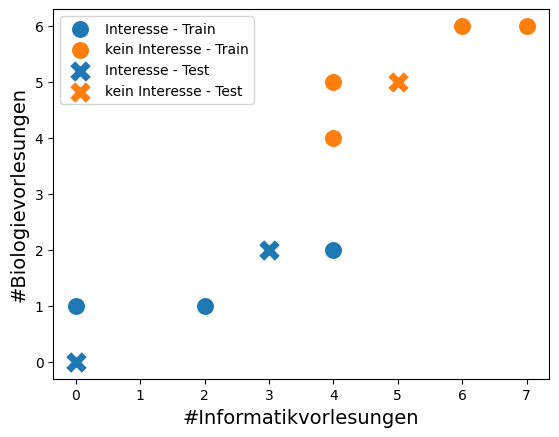

In [5]:
X_train_0 = X_train[y_train == 0]
X_train_1 = X_train[y_train == 1]

X_test_0 = X_test[y_test == 0]
X_test_1 = X_test[y_test == 1]

plt.scatter(X_train_0[:,0], X_train_0[:,1], label="Interesse - Train", color='#1f77b4', s=125)
plt.scatter(X_train_1[:,0], X_train_1[:,1], label="kein Interesse - Train", color='#ff7f0e', s=125)

plt.scatter(X_test_0[:,0], X_test_0[:,1], marker="x", label="Interesse - Test", color='#1f77b4', s=125, linewidth=5)
plt.scatter(X_test_1[:,0], X_test_1[:,1], marker="x", label="kein Interesse - Test", color='#ff7f0e', s=125, linewidth=5)

plt.xlabel("#Informatikvorlesungen", fontsize=14)
plt.ylabel("#Biologievorlesungen", fontsize=14)
plt.legend()
plt.show()

### Vorhersage

In [8]:
class KNNClassifier(object):
    def __init__(self, k=5, dist_function=euclidean_distance):
        self.k = k
        self.dist_function = dist_function
        self.X = None
        self.y = None

    def fit(self, X, y):
        self.X = X
        self.y = y

    def predict(self, X, p=False):
        # Da wir auch mehrere Punkte vorhersagen können möchten,
        # nehmen wir an, dass X immer eine Liste oder ein Array ist 
        predictions = []
        if not isinstance(X, list) and not isinstance(X, np.ndarray):
            X = [X]
        
        for point in X:
            distances = euclidean_distance(self.X,point) # Berechne die Distanzen zu allen anderen Punkten
            # Als nächstes sortieren wir die Distanzen
            # np.argsort gibt hierbei die Indices zurück,
            # Beispiel: np.argsort([1,3,2]) = 0,2,1
            sorted_distances = np.argsort(distances)
            kNearest = self.y[sorted_distances[:self.k]] # Wähle k nächste Punkte aus
            predicted_class = np.argmax(np.bincount(kNearest)) # Wähle die häufigste Klasse
            predictions.append(predicted_class)
        return np.array(predictions)

### Vergleich unserer Implementierung vs. sklearn

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

our_knn_classifier = KNNClassifier()
our_knn_classifier.fit(X_train, y_train)

sklearn_knn_classifier = KNeighborsClassifier()
sklearn_knn_classifier.fit(X_train, y_train)

our_multinomial_acc = accuracy_score(y_test, our_knn_classifier.predict(X_test))
sklearn_multinomial_acc = accuracy_score(y_test, sklearn_knn_classifier.predict(X_test))

print(f"Unsere Accuracy: {our_multinomial_acc:.3f} | Sklearn-Accuracy: {sklearn_multinomial_acc:.3f}")

Unsere Accuracy: 1.000 | Sklearn-Accuracy: 1.000


### Decision Boundary visualisieren

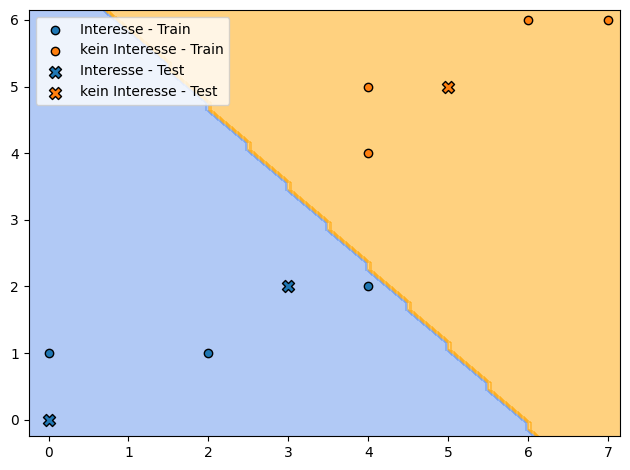

In [10]:
res = 0.1  # Auflösung des Grids

# Intervallgrenzen
x_max, y_max = np.max(X, axis=0) + 0.25 
x_min, y_min = np.min(X, axis=0) - 0.25

# Colormap definieren
cmap_light = ListedColormap([ 'cornflowerblue', 'orange'])

# Grid definieren
grid_x, grid_y = np.meshgrid(np.arange(x_min, x_max, res),
                             np.arange(y_min, y_max, res))
grid_input = np.c_[grid_x.reshape(-1), grid_y.reshape(-1)]

# Vorhersagen und score berechnen
grid_out = our_knn_classifier.predict(grid_input).reshape(grid_x.shape)

# Plot erstellen
plt.contourf(grid_x, grid_y, grid_out, alpha=0.5, cmap=cmap_light) #plt.cm.cividis)

plt.scatter(X_train_0[:,0], X_train_0[:,1], label="Interesse - Train", edgecolor='k')
plt.scatter(X_train_1[:,0], X_train_1[:,1], label="kein Interesse - Train", edgecolor='k')

plt.scatter(X_test_0[:,0], X_test_0[:,1], s=75, label="Interesse - Test", marker="X", edgecolor='k', color='#1f77b4')
plt.scatter(X_test_1[:,0], X_test_1[:,1], s=75, label="kein Interesse - Test", marker="X", edgecolor='k', color='#ff7f0e')

plt.tight_layout()
plt.legend()
plt.show()
plt.close()

# Regression

### Daten definieren und aufteilen

In [11]:
y = np.array([0.7, 1.2, 2.5, 3, 2.8, 5.1, 6.7, 7.38710581, 8, 9.8])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12345)

### Daten visualisieren

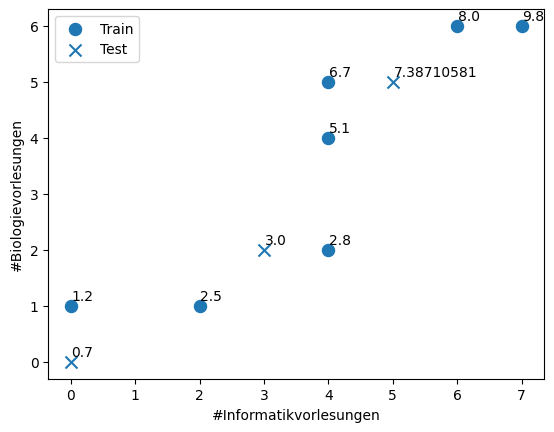

In [12]:
plt.scatter(X_train[:,0], X_train[:,1], color='#1f77b4', label="Train", s=75)

plt.scatter(X_test[:,0], X_test[:,1], marker="x", color='#1f77b4', label="Test", s=75)

for i in range(10):
    plt.annotate(y[i], (X[i][0]+0.01, X[i][1]+0.1))

plt.xlabel("#Informatikvorlesungen")
plt.ylabel("#Biologievorlesungen")
plt.legend()

plt.show()

### Vorhersage

In [13]:
class KNNRegressor(object):
    def __init__(self, k=5, dist_function=euclidean_distance):
        self.k = k
        self.dist_function = dist_function
        self.X = None
        self.y = None

    def fit(self, X, y):
        self.X = X
        self.y = y

    def predict(self, X, p=False):
        predictions = []
        if not isinstance(X, list) and not isinstance(X, np.ndarray):
            X = [X]
        
        for point in X:
            distances = euclidean_distance(self.X,point) 
            sorted_distances = np.argsort(distances)
            kNearest = self.y[sorted_distances[:self.k]]
            predicted_class = np.mean(kNearest) # <-- Unterschied: hier Mittelwert bestimmen
            predictions.append(predicted_class)
        return np.array(predictions)

### Vergleich unserer Implementierung vs. sklearn

In [14]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

our_knn_regressor = KNeighborsRegressor()
our_knn_regressor.fit(X_train, y_train)

sklearn_knn_regressor = KNeighborsRegressor()
sklearn_knn_regressor.fit(X_train, y_train)

our_multinomial_mse = mean_squared_error(y_test, our_knn_regressor.predict(X_test))
sklearn_multinomial_mse = mean_squared_error(y_test, sklearn_knn_regressor.predict(X_test))

print(f"Unser MSE: {our_multinomial_mse:.3f} | Sklearn-MSE: {sklearn_multinomial_mse:.3f}")

Unser MSE: 3.340 | Sklearn-MSE: 3.340
